In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
#Muestra todos los datasets que contiene la librería seaborns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Exploración del Dataframe

In [4]:
#Cargamos el dataset titanic
titanic = sns.load_dataset('titanic')

#Muestra las primeras filas
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Significado de los atributos

*   **survived**:	Supervivencia	(0 = No, 1 = Sí)
*   **pclase**:	clase de boleto	(1 = 1°, 2 = 2°, 3 = 3°)
*   **class**:	clase de boleto como cadena de texto (First, Second, Third)
*   **sex**:	Sexo (male, female)
*   **who**:	Sexo (man, woman)
*   **adult_male**: persona adulta o niño ( True: es adulto, False: no es adulto)
*   **age**: Edad en años	
*   **sibsp**: cantidad de hermanos/cónyuges a bordo del Titanic. Misma generación	(0 = No, 1 = Sí)
*   **parch**: cantidad de padres/hijos a bordo del Titanic. Antecedentes o Desendientes (0 = No, 1 = Sí)	
*   **fare**:	tarifa de pasajero		
*   **embarked**:	Puerto de embarque	(C = Cherburgo, Q = Queenstown, S = Southampton)
*   **embark_town**: Ciudad de embarque (Cherburgo, Queenstown, Southampton)
*   **deck**: cubierta en la que viajaba el pasajero
*   **alive**: sobrevivió (yes, no)
*   **alone**: el pasajero viajaba solo o acompañado (True = viajaba solo, False = viajaba acompañado)

### Análisis del Dataframe

In [5]:
#Muestra las dimensiones del dataset titanic
titanic.shape

(891, 15)

In [6]:
#Muestra los valores únicos de la columna 'embark_town'
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [7]:
#Muestra los nombres de las columnas
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
#Muestra la información de los datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
#Muestra una descripción de los datos
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Muestra la suma de valores nulos por columna
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

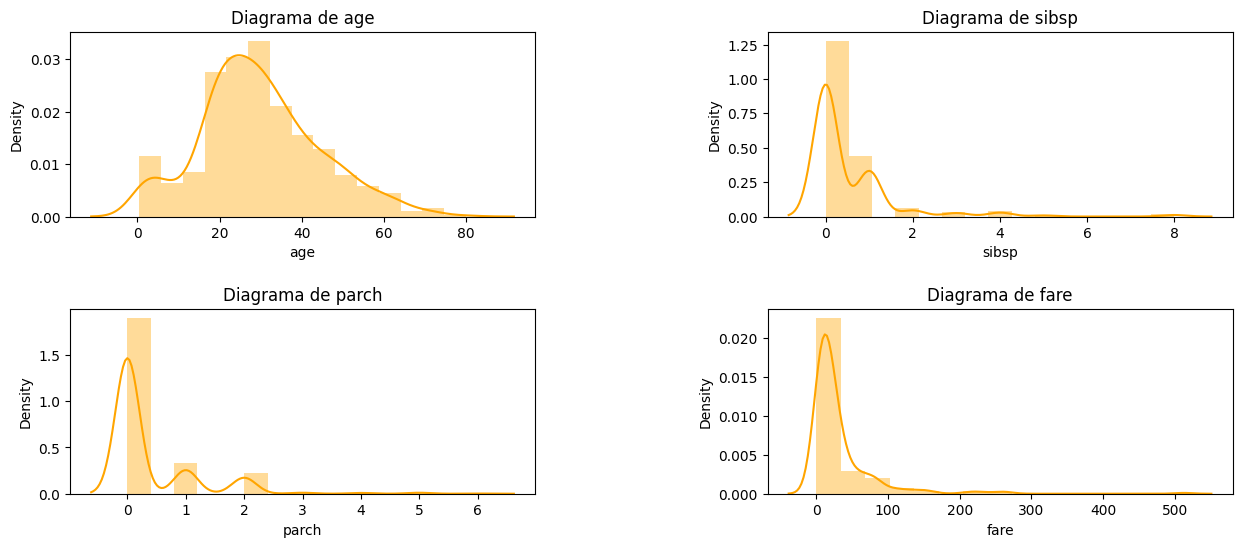

In [11]:
#Muestra la distribución de la variable 'age', 'sibsp', 'parch' y 'fare'
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age' , 'sibsp', 'parch', 'fare']:
    n += 1
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(titanic[x] , bins = 15, color= 'Orange')
    plt.title('Diagrama de {}'.format(x))
plt.show()

survived
0    549
1    342
dtype: int64


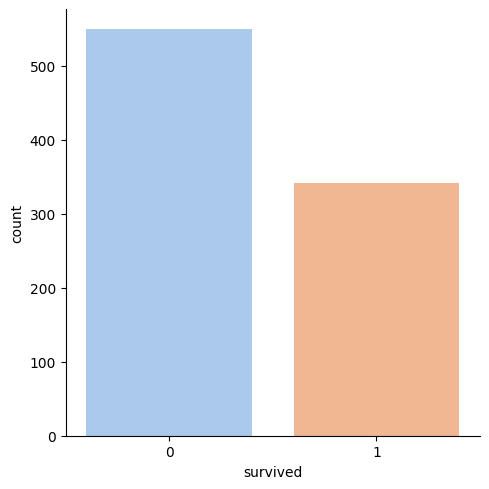

In [12]:
#Muestra la suma de valores nulos por columna
print(titanic.groupby('survived').size())
sns.catplot(data=titanic, x='survived', kind='count', palette='pastel')

La cantidad de sobrevivientes y no sobrevivientes esta ligeramente desbalanceada.

survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


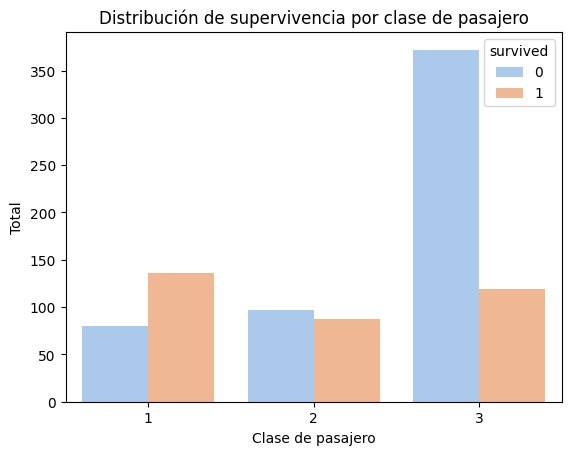

In [13]:
#imprime la distribución de supervivencia por clase de pasajero
print(pd.crosstab(titanic['pclass'], titanic.survived, margins=True))
#crea un gráfico de barras de distribución de supervivencia por clase de pasajero
ax = sns.countplot(x="pclass", hue="survived", data=titanic, palette= 'pastel')
ax.set(title = "Distribución de supervivencia por clase de pasajero", xlabel = "Clase de pasajero", ylabel = "Total")
plt.show()

Analizando la cantidad de sobrevivientes por clase en la que viajaban se puede observar que:

1. En primera clase hubieron más sobrevientes que no sobrevivientes. Incluso la mayor cantidad de sobrevivientes por clases fueron en primera clase.

2. En segunda clase la cantidad de sobrevivientes y no sobrevivientes esta mucho mas balanceada, minimamente es mayor la cantidad de los que no sobrevivieron.

3. En tercera clase se observa que la cantidad de no sobrevivientes es muy alta, casi 4 veces la cantidad de los que sobrevivieron. En esta clase se encuentran la mayor cantidad de no sobrevivientes. Por último la cantidad de personas que viajaron en esta clase es incluso más del doble de cualquiera de las otras clases.

survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


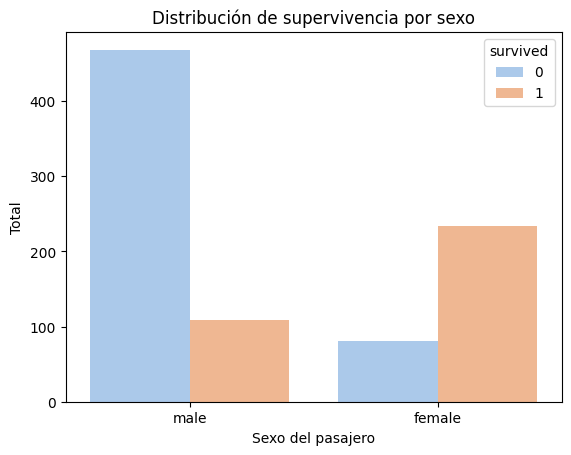

In [14]:
#imprime la distribución de supervivencia por sexo
print(pd.crosstab(titanic['sex'], titanic.survived, margins=True))
#Crea un gráfico de barras de distribución de supervivencia por sexo del pasajero
ax = sns.countplot(x="sex", hue="survived", data=titanic, palette= 'pastel')
ax.set(title = "Distribución de supervivencia por sexo", xlabel = "Sexo del pasajero", ylabel = "Total")
plt.show()

Cada 5 mujeres 1 murio y 4 sobrevivieron, mientras que cada 5 hombres 1 sobrevivio y 4 muerieron. 
De 10 sobrevivientes 7 eran mujeres y solo 3 eran hombres.

survived    0    1  All
age_cats               
Children   69   70  139
Young     221  137  358
Adult     117   78  195
Old        17    5   22
All       424  290  714


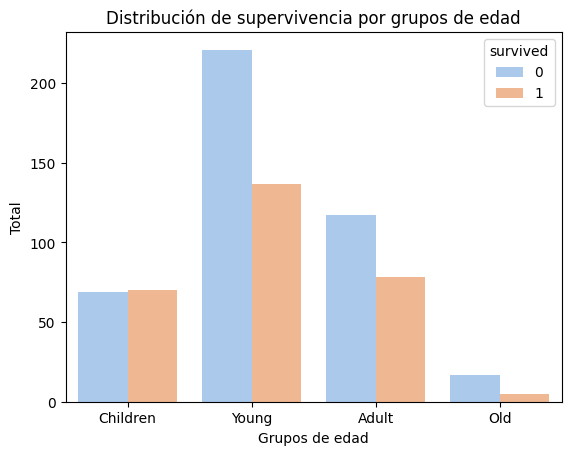

In [15]:
interval = (0, 18, 35, 60, 120)
categories = ['Children', 'Young', 'Adult', 'Old']
titanic['age_cats'] = pd.cut(titanic.age, interval, labels = categories)

print(pd.crosstab(titanic['age_cats'], titanic.survived, margins=True))
ax = sns.countplot(x="age_cats", hue="survived", data=titanic, palette= 'pastel')
ax.set(title = "Distribución de supervivencia por grupos de edad", xlabel = "Grupos de edad", ylabel = "Total")
plt.show()

Se observa que al rededor del 80% de los pasajeros son jovenes y adultos, mayormente jovenes de entre 18 y 35 años. Además, se observa que la mayoría de pasajeros que no sobrevivieron perteneces al mismo rango de edad.

survived    0    1  All
embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


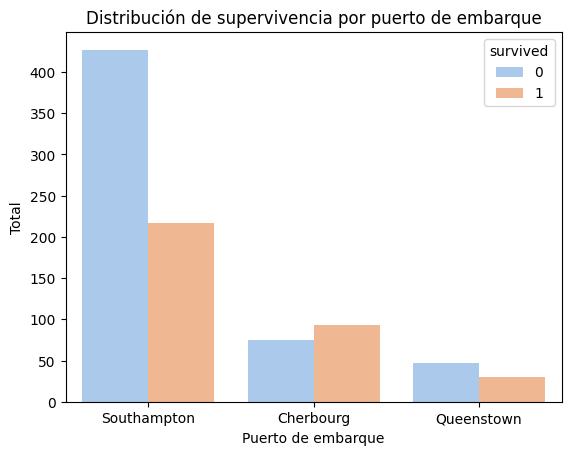

In [16]:
print(pd.crosstab(titanic['embarked'], titanic.survived, margins=True))
ax = sns.countplot(x = 'embark_town', hue = 'survived', data = titanic, palette= 'pastel')
ax.set(title = "Distribución de supervivencia por puerto de embarque", xlabel = "Puerto de embarque", ylabel = "Total")
plt.show()

class        First  Second  Third  All
embark_town                           
Cherbourg       85      17     66  168
Queenstown       2       3     72   77
Southampton    127     164    353  644
All            214     184    491  889


[Text(0.5, 1.0, 'Distribución de clases por puerto de embarque'),
 Text(0.5, 0, 'Puerto de embarque'),
 Text(0, 0.5, 'Total')]

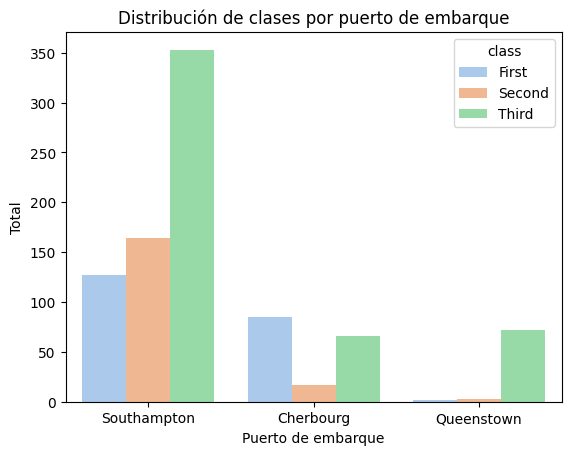

In [17]:
print(pd.crosstab(titanic['embark_town'], titanic['class'], margins=True))
ax = sns.countplot(x = 'embark_town', hue = 'class', data = titanic, palette= 'pastel')
ax.set(title = "Distribución de clases por puerto de embarque", xlabel = "Puerto de embarque", ylabel = "Total")

En estos dos últimos graficos podemos observar lo siguiente:

    1. La mayor parte de los pasajeros abordaron en la ciudad de Southampton (644). Ciudad de la cual partio el titac.
    2. La mayor parte de los pasajeros que abordaron en la ciudad de Southampton lo hicieron en tercera clase (353 de 644 pasajeros).
    3. De los 644 pasajeros que abordaron en la ciudad de Southampton solo sobrevivieron 217.

## Preparación de los datos

### Columna 'age'

<Axes: xlabel='age'>

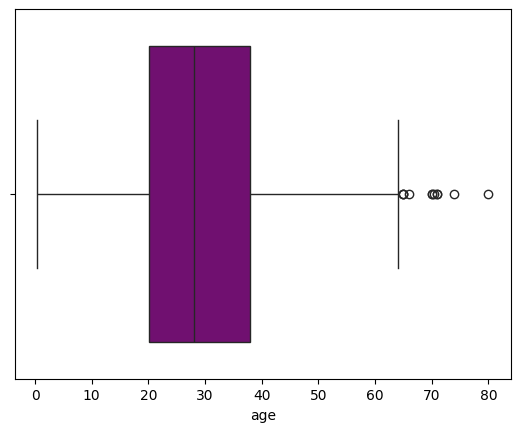

In [18]:
#grafico de caja de la columna 'age'
sns.boxplot(x=titanic['age'], color='Purple')

In [19]:
#Filtrar el dataframe para obtener las filas donde la edad es mayor a 65 años
age_above_58 = titanic[titanic['age'] > 58]
age_above_58_sorted = age_above_58.sort_values(by='class', ascending=False)
print(age_above_58_sorted[['age','survived','class']])

      age  survived   class
483  63.0         1   Third
116  70.5         0   Third
326  61.0         0   Third
280  65.0         0   Third
851  74.0         0   Third
94   59.0         0   Third
33   66.0         0  Second
570  62.0         1  Second
684  60.0         0  Second
672  70.0         0  Second
232  59.0         0  Second
829  62.0         1   First
745  70.0         0   First
694  60.0         0   First
630  80.0         1   First
625  61.0         0   First
587  60.0         1   First
170  61.0         0   First
555  62.0         0   First
493  71.0         0   First
54   65.0         0   First
456  65.0         0   First
438  64.0         0   First
366  60.0         1   First
96   71.0         0   First
275  63.0         1   First
252  62.0         0   First
545  64.0         0   First


Se observa que de los pasajeros mayores de 58 años, solo sobrevivieron 7 de 28 pasajeros. Esta información podría ser relevante en el modelo, ya que puede indicar que la edad avanzada estaba asociada con una mayor probabilidad de no supervivencia. Los árboles son relativamente robustos a los outliers porque dividen los datos en base a umbrales y no son tan sensibles a valores extremos como otros modelos (p. ej regresión lineal).
Se toma la decisión de conservar los outliers de la columna 'age'. 

In [20]:
#Muestra las filas con valores nulos de la columna 'age'
missig_age_rows = titanic[titanic['age'].isnull()]
missig_age_rows.head(16)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cats
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,NaN
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,NaN
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,NaN
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,NaN
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,NaN
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True,NaN
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True,NaN


Filtrando los valores nulos  de la columna 'age' podemos ver que para el caso de los hombres que la columna 'adult_male' tiene el valor true, lo que significa que son hombres mayores de edad.  Para el caso de las mujeres el analisis se puede hacer por las columnas 'alone', 'sibsp' y 'parch', por la columna alone observamos que 4 de ellas viajaron sin compañia, por lo que debe tratarse de una persona adulta,  la pasajera mujer restante no viajo acompañada de un padre o un hijo y si la acompañaba un hermano/conyuge por lo que se supondra que se trat de una mujer mayor de edad. 
Finalmente se rellenaran los valores faltantes de la columna 'age' con el promedio de la edad del resto de los pasajeros mayores de 18 años y menores de 58 años, de esta manera se afectara lo menos posible el modelo.

In [21]:
#Filtrar pasajeros con edades entre 18 y 58 años
age_filtered = titanic[(titanic['age'] >= 18) & (titanic['age'] <= 58)]

#Calcular el promedio de edad de los pasajeros filtrados
mean_age = age_filtered['age'].mean()

#Completa los datos faltantes en la columna 'age' con el promedio calculado
titanic['age'].fillna(mean_age, inplace=True)

#Verifica que los datos faltantes han sido completados
print(titanic['age'].isnull().sum())

0


### columna embarked y embark_town

In [22]:
missing_embarked_rows = titanic[titanic['embarked'].isnull()]
missing_embarked_rows.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cats
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,Adult
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,Old


Dado que los pasajeros están en primera clase y pagaron una tarifa alta, es posible que hayan embarcado en un puerto específico asociado con tarifas más altas.

In [23]:
high_fare_first_class = titanic[(titanic['pclass'] == 1) & (titanic['fare'] > 80) & (titanic['sex'] == 'female')]
high_fare_first_class['embark_town'].value_counts()

embark_town
Cherbourg      24
Southampton    23
Queenstown      1
Name: count, dtype: int64

In [24]:
#Completa los datos faltantes en la columna 'embarked' con 'C'
titanic['embark_town'].fillna('Cherbourg', inplace=True)

### Selección de columnas para el modelo

In [25]:
#Elimina las columnas que considera que no son necesarias para el analisis
titanic.drop(['deck','alive','embarked','pclass','who','age_cats'], axis=1, inplace=True)
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,True,Southampton,True


### Preprocesamiento de datos categóricos

In [26]:
#Aplica OneHotEncoder sobre las variables que son 'dummy'
X = pd.get_dummies(titanic, prefix_sep='-', dummy_na=False, columns=['class','embark_town'])

X.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,class-First,class-Second,class-Third,embark_town-Cherbourg,embark_town-Queenstown,embark_town-Southampton
0,0,male,22.0,1,0,7.2500,True,False,False,False,True,False,False,True
1,1,female,38.0,1,0,71.2833,False,False,True,False,False,True,False,False
2,1,female,26.0,0,0,7.9250,False,True,False,False,True,False,False,True
3,1,female,35.0,1,0,53.1000,False,False,True,False,False,False,False,True
4,0,male,35.0,0,0,8.0500,True,True,False,False,True,False,False,True


In [27]:
#Aplica Encoder sobre las variables que son 'etiquetables'
le = LabelEncoder()
columns = ['sex','adult_male','alone']
for col in columns:
    X[col] = le.fit_transform(X[col])

X.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,class-First,class-Second,class-Third,embark_town-Cherbourg,embark_town-Queenstown,embark_town-Southampton
0,0,1,22.0,1,0,7.2500,1,0,False,False,True,False,False,True
1,1,0,38.0,1,0,71.2833,0,0,True,False,False,True,False,False
2,1,0,26.0,0,0,7.9250,0,1,False,False,True,False,False,True
3,1,0,35.0,1,0,53.1000,0,0,True,False,False,False,False,True
4,0,1,35.0,0,0,8.0500,1,1,False,False,True,False,False,True


### Busqueda de correlación entre los datos

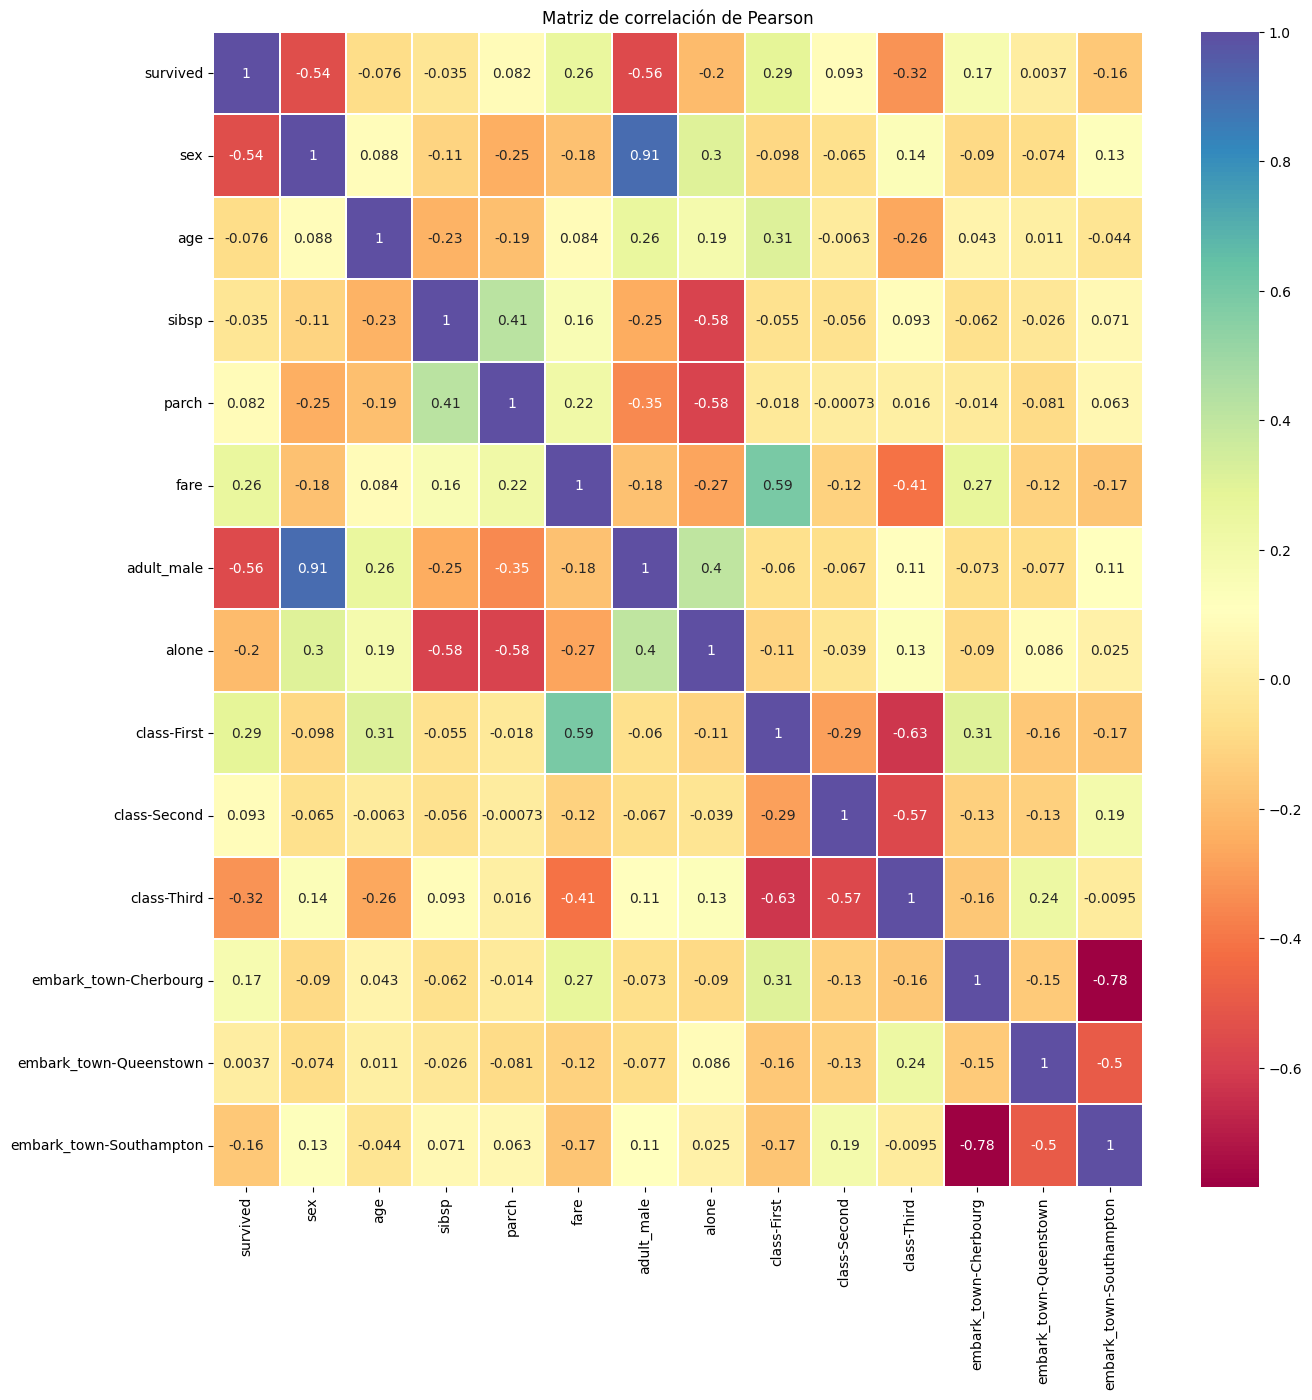

In [28]:
#Crea el mapa de calor
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap='Spectral', linecolor='white', linewidths=.1)
plt.title('Matriz de correlación de Pearson')
plt.show()

1. Supervivencia (survived):

    - La correlación con sex es negativa (-0.54), indicando que hay una relación entre ser mujer y tener mayor probabilidad de sobrevivir.
    - Correlación positiva con fare (0.26), lo que sugiere que los pasajeros con tarifas más altas tenían más probabilidad de sobrevivir.
    - Correlación negativa con adult_male (-0.56), lo cual indica que ser un hombre adulto estaba asociado con una menor probabilidad de sobrevivir.
    - Correlación negativa con class-third (-0.32) y positiva con class-First (0.29), mostrando que los pasajeros de tercera clase tenían menos probabilidades de sobrevivir en comparación con los de primera clasa.

2. Sexo (sex):

    - Fuertemente correlacionado con adult_male (0.91), indicando que la mayoría de los pasajeros eran hombres adultos.

3. Edad (age):

    - Tienen una ligera correlación con fare (0.12), lo que podría sugerir que los pasajeros de ciertas edades pagaron tarifas diferentes.

4. Cantidad de hermanos/cónyuges (sibsp):

    - Correlación con parch (0.41), lo cual tiene sentido ya que tener más familiares a bordo podría incluir tanto hermanos/cónyuges como padres/hijos.

5. Tarifa (fare):

    - Correlación positiva con class-First (0.59) y negativa con class-Third (-0.41), indicando que los pasajeros de primera clase pagaron más. 

6. Viajar solo (Alone):

    - Correlación positiva con adult_male (0.4) y sex (0.3), lo cual indica que la mayoria de los que viajaron solos eran hombres adultos.

7. Puertos de embarque (embark_town):

    - Cherbourg tiene una correlación positiva con fare (0.27), indicando que los pasajeros que embarcaron en esta ciudad pagaron tarigas más altas.

In [29]:
titanic.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'embark_town', 'alone'],
      dtype='object')

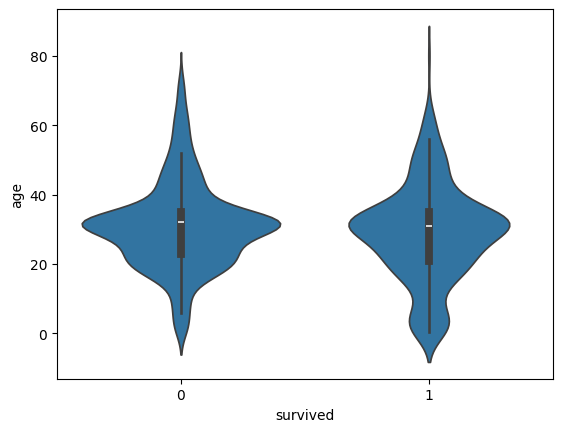

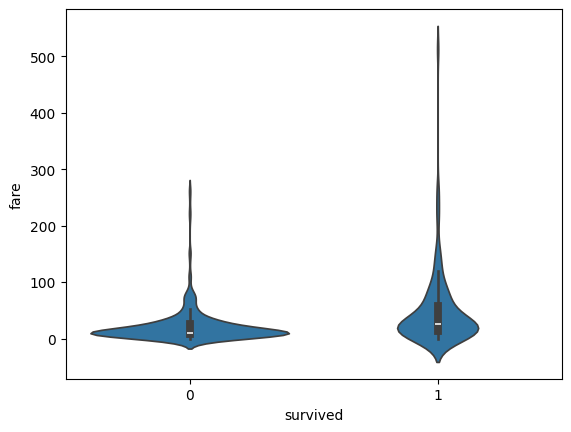

In [30]:
sns.violinplot(x='survived', y='age', data=titanic)
plt.show()

sns.violinplot(x='survived', y='fare', data=titanic)
plt.show()

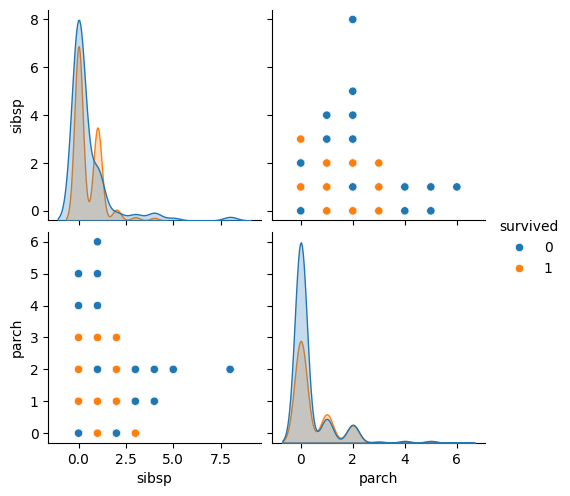

In [31]:
sns.pairplot(titanic, vars=['sibsp', 'parch'], hue='survived')
plt.show()

## Árbol clasificador

In [32]:
#define la variable a predecir
y = X.pop('survived')


In [33]:
#Separa el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16, stratify=y) #stratify=y garantiza que ambos conjuntos tienen la misma proporcion de datos.

criterio ='entropy'
arbol = DecisionTreeClassifier(criterion=criterio, random_state=16)
arbol.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",16
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curr

[0.01224088 0.21732232 0.01721158 0.03212803 0.26285654 0.26157938
 0.01923198 0.02899504 0.00198083 0.10637844 0.01756271 0.01145765
 0.01105461]


<Axes: ylabel='None'>

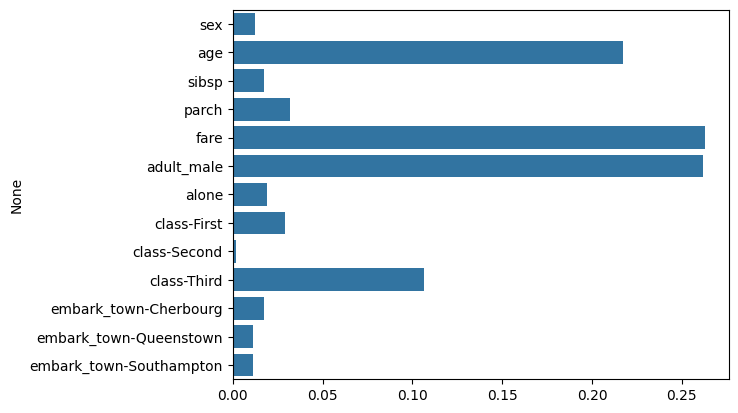

In [34]:
#Grafica la importancia de las variables
fi = arbol.feature_importances_
print(fi)
sns.barplot(y = X_train.columns, x = fi)

Estas son las características más importantes que siguio el algoritmo para desarrollar el árbol, lo cual no significa que sean las mejores características para abordar el problema.

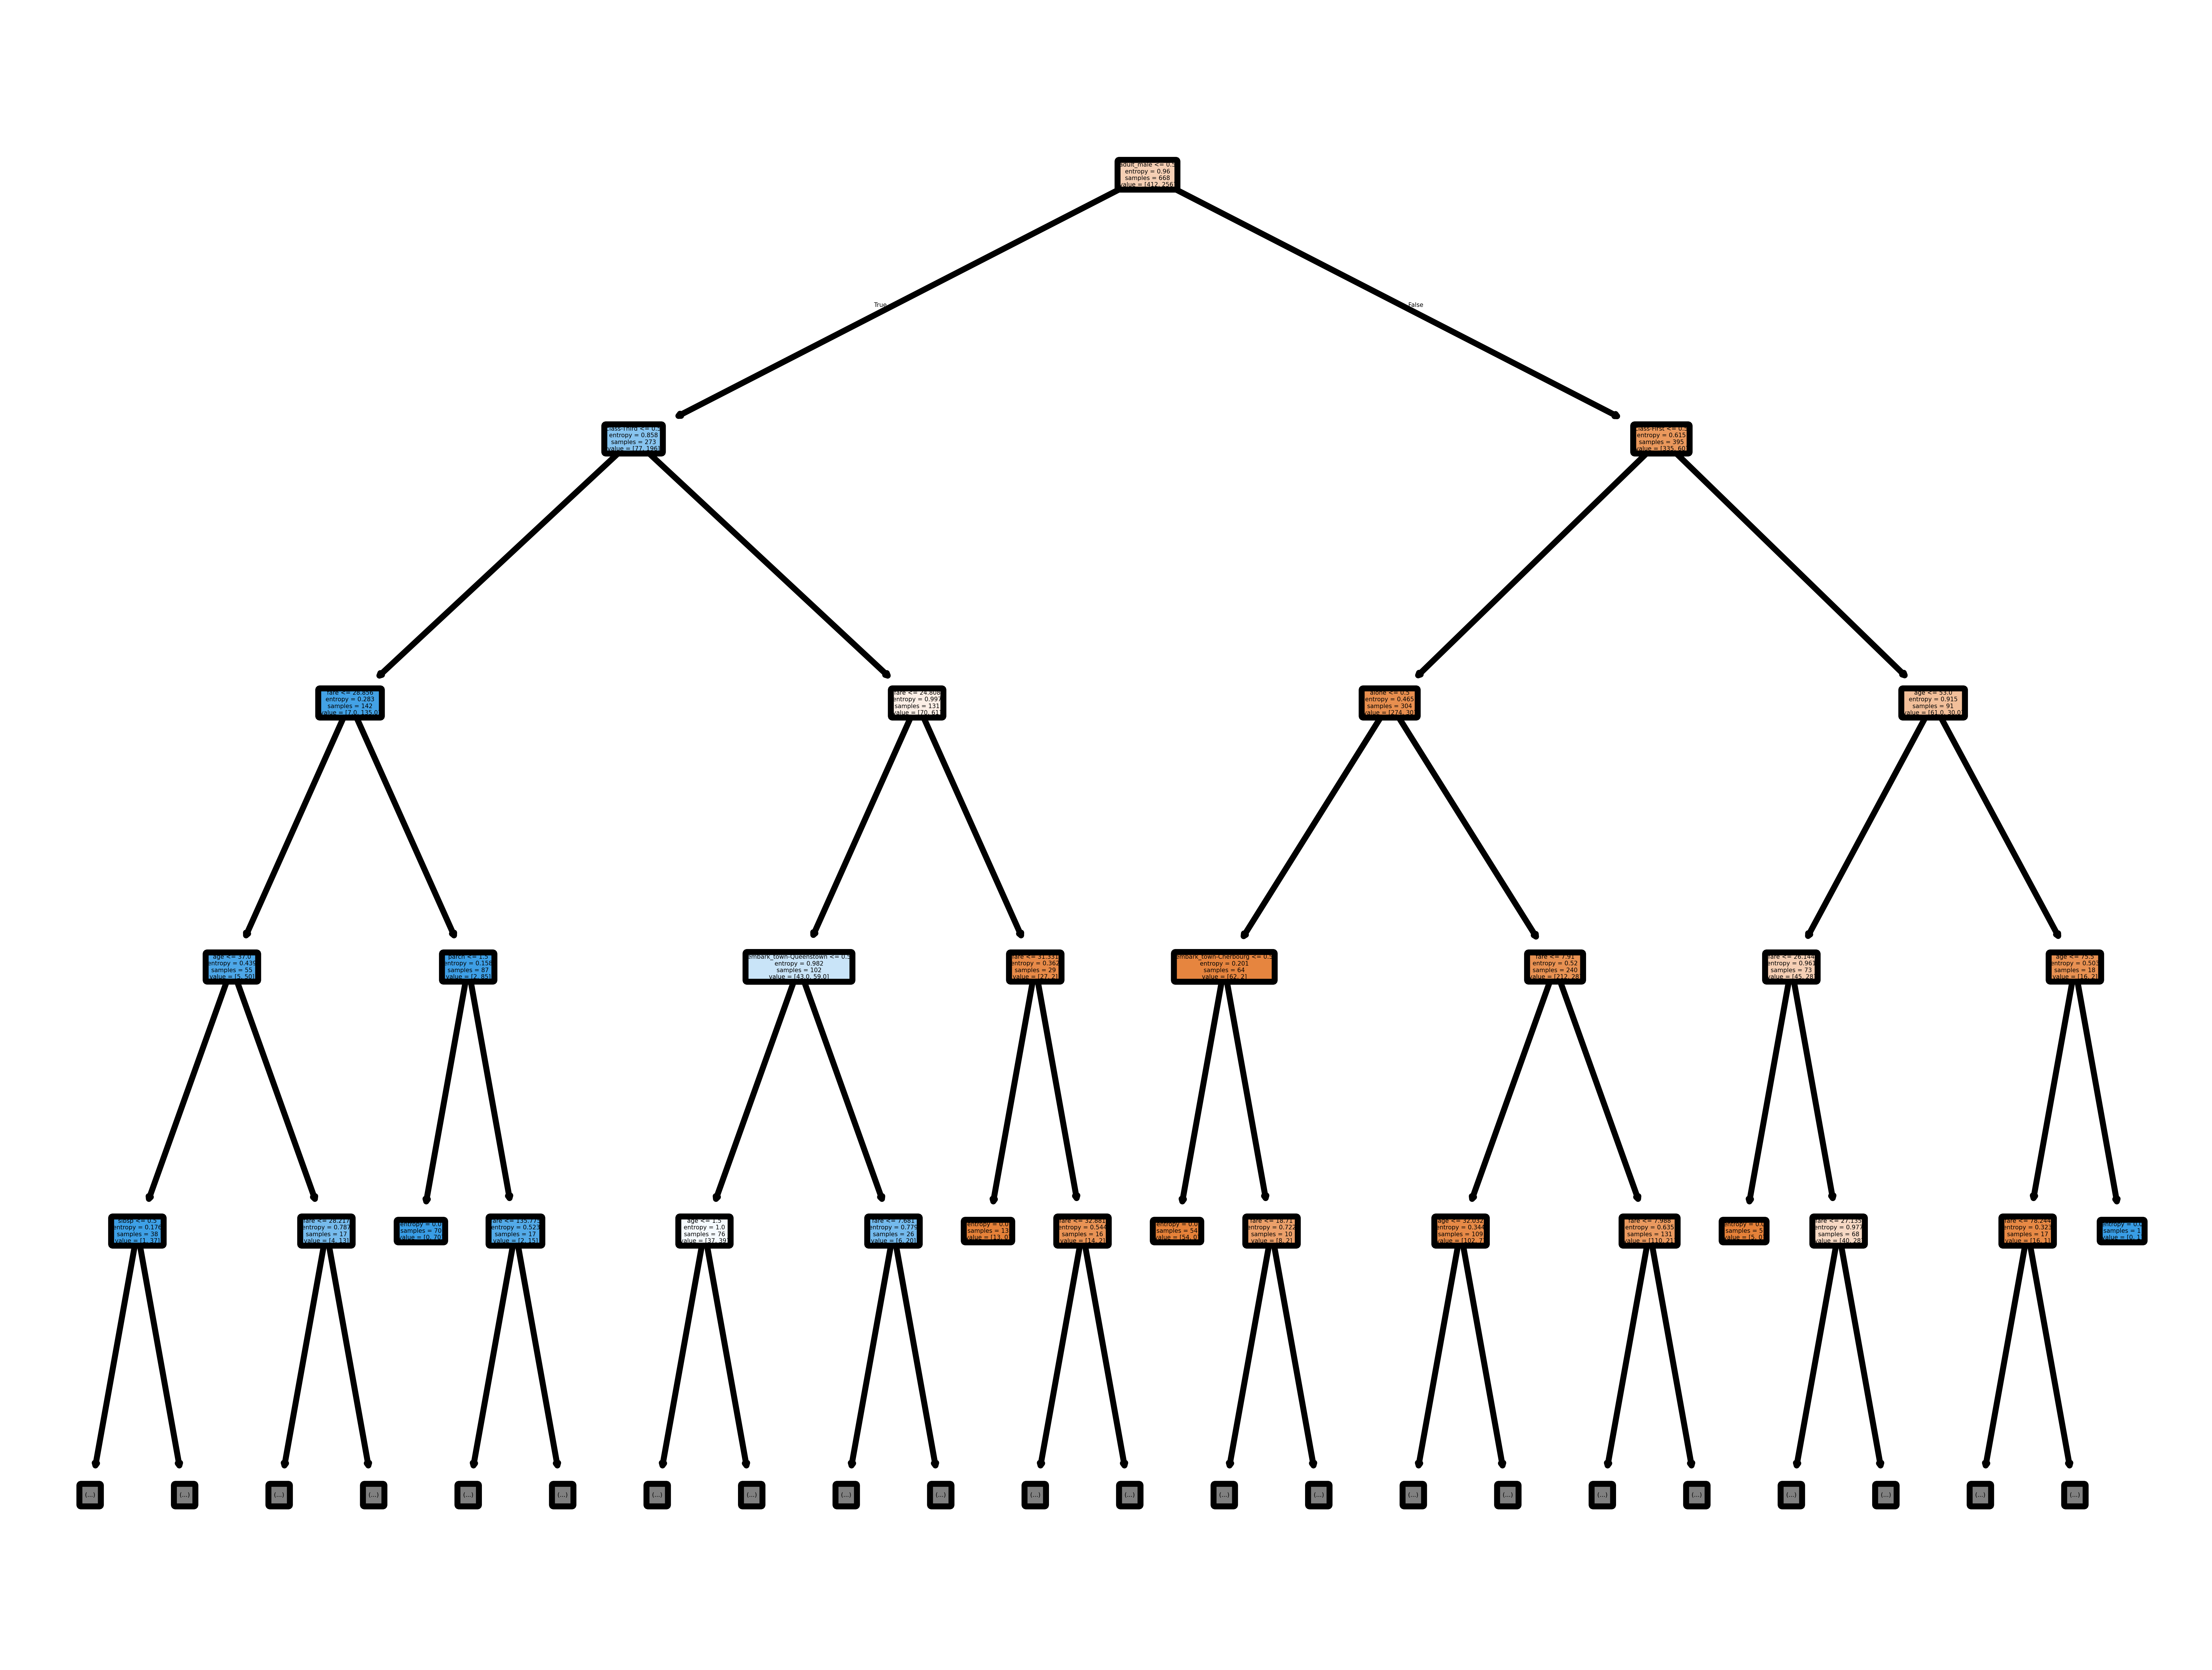

In [35]:
#Grafica el árbol
list_features = list(X.columns)
plt.figure(dpi=1500)
plot_tree(arbol, filled=True, rounded=True, feature_names=list_features, max_depth=4)
plt.show()
plt.close()

In [36]:
#Evaluamos el modelo
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test: ', arbol.score(X_test, y_test))

Score train:  0.9925149700598802
Score test:  0.7802690582959642


El árbol tiene tendencia a sobre ajustar ya que en el entrenamiento tiene un score mayor al 99%, aprendiendo de memoria de los datos, mientras que en el test el score baja a casi el 80%.

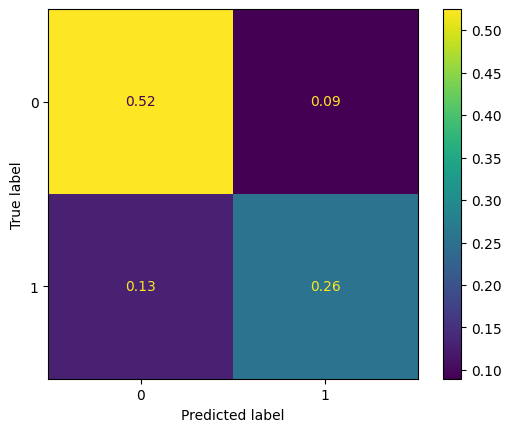

In [37]:
#Matriz de confusion sobre el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred, normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [38]:
X.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'class-First', 'class-Second', 'class-Third', 'embark_town-Cherbourg',
       'embark_town-Queenstown', 'embark_town-Southampton'],
      dtype='object')

In [39]:
#Simulación de predicción
leo = {'sex': [0], 'age': [23], 'sibsp': [0], 'parch': [0], 'fare': [7.], 'adult_male': [1], 'alone': [1],
       'class-First':[0], 'class-Second': [0], 'class-Third': [1], 'embark_town-Cherbourg': [0],
       'embark_town-Queenstown': [0], 'embark_town-Southampton': [1]}
pd_leo = pd.DataFrame.from_dict(leo)

print('Leo sobrevivio?', arbol.predict(pd_leo))

Leo sobrevivio? [0]


In [40]:
#Simulación de predicción
roses = {'sex': [1], 'age': [20], 'sibsp': [0], 'parch': [1], 'fare': [70.], 'adult_male': [0], 'alone': [0],
       'class-First':[1], 'class-Second': [0], 'class-Third': [0], 'embark_town-Cherbourg': [0],
       'embark_town-Queenstown': [0], 'embark_town-Southampton': [1]}

pd_roses = pd.DataFrame.from_dict(roses)

print('Roses sobrevivio?', arbol.predict(pd_roses))

Roses sobrevivio? [1]


## Sobre ajuste

In [41]:
#Calcula la Profundidad del árbol
print(f'Máxima profundidad:  {arbol.get_depth()}')
#Calcula el número de hojas del árbol
print(f'Cantidad de hojas: {arbol.get_n_leaves()}')

Máxima profundidad:  22
Cantidad de hojas: 152


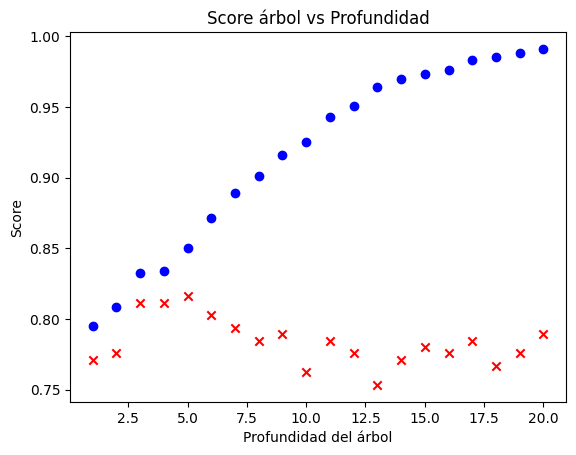

In [42]:
#Calcula la Profundidad del árbol y el score que tiene los set de entrenamiento y testeo
depth = [i+1 for i in range(20)]
score_train = []
score_test = []
for dep in depth:
    tree = DecisionTreeClassifier(criterion=criterio, max_depth=dep, random_state=16)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    '''
    print(f'Profundidad: {dep}')
    print(f'Precision train: {tree.score(X_train, y_train)}')
    print(f'Precision test: {tree.score(X_test, y_test)}')
    '''
    score_train.append(tree.score(X_train, y_train))
    score_test.append(tree.score(X_test, y_test))


#Grafica 
plt.scatter(x=depth, y=score_train, marker='o', color='blue')
plt.scatter(x=depth, y=score_test, marker='x', color='red')
plt.title('Score árbol vs Profundidad')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Score')
plt.show()

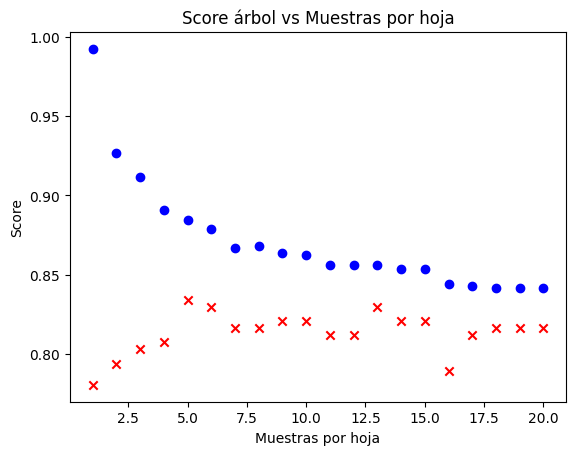

In [43]:
#Regula la cantidad de muestras minima por hoja
samplex = [i+1 for i in range(20)]
score_train1 = []
score_test1 = []
for sam in samplex:
    tree = DecisionTreeClassifier(criterion=criterio, min_samples_leaf=sam, random_state=16)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    '''
    print(f'Profundidad: {sam}')
    print(f'Precision train: {tree.score(X_train, y_train)}')
    print(f'Precision test: {tree.score(X_test, y_test)}')
    '''
    score_train1.append(tree.score(X_train, y_train))
    score_test1.append(tree.score(X_test, y_test))

#Grafica
plt.scatter(x=samplex, y=score_train1, marker='o', color='blue')
plt.scatter(x=samplex, y=score_test1, marker='x', color='red')
plt.title('Score árbol vs Muestras por hoja')
plt.xlabel('Muestras por hoja')
plt.ylabel('Score')
plt.show()


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

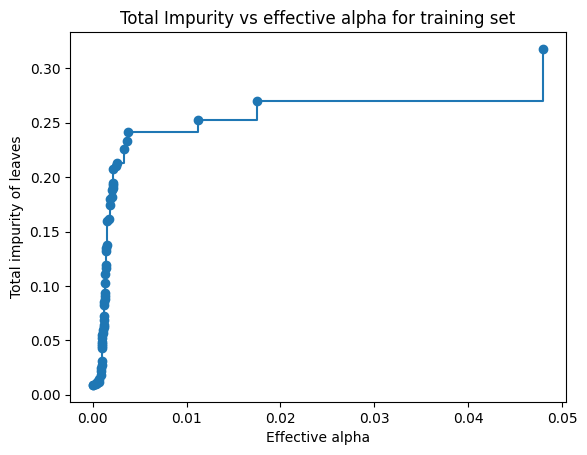

In [44]:
#poda posterior, ccpalfa (cost complexity pruning path)
clas = DecisionTreeClassifier(random_state=16)
path = clas.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=16, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15486253993246685


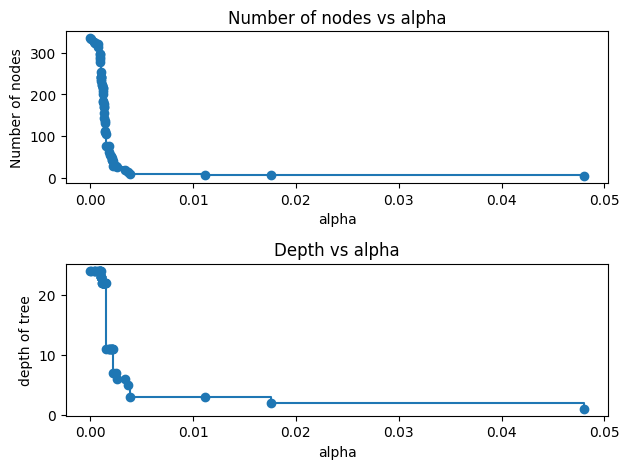

In [46]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Calcula la cantidad de nodos y la profundidad para cada clasificador
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

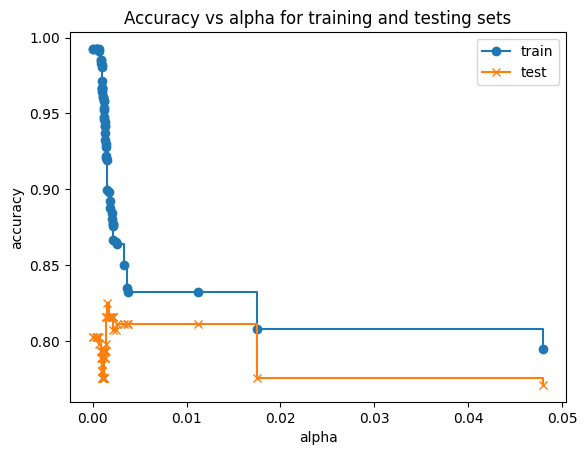

In [47]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
               
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='x', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
alfas = ccp_alphas
scor = np.array(test_scores)

alfa_score = pd.DataFrame({'alpha':alfas, 'score':scor})
indice = alfa_score['score'].idxmax()
alfa_max = alfa_score['alpha'].iloc[indice]
print('Mejor alfa:', alfa_max)

Mejor alfa: 0.0015438902414950317


In [49]:
alfas = ccp_alphas
sco = np.array(test_scores)
score = np.array(train_scores)
alfa_score = pd.DataFrame({'alpha':alfas, 'score_test':sco, 'score_train':score})
alfa_score['diferencia'] = alfa_score['score_train'] - alfa_score['score_test']
index = alfa_score['diferencia'].idxmin()
alfa_best = alfa_score['alpha'].iloc[index]
print('Mejor alfa:', alfa_best)

Mejor alfa: 0.003820918534448131


Score train:  0.8323353293413174
Score test:  0.8116591928251121


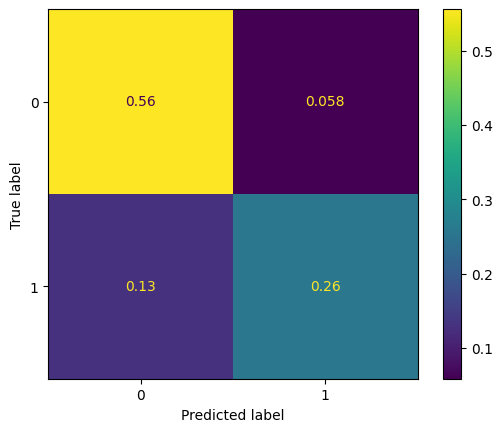

In [50]:
arbol_alfa = DecisionTreeClassifier(criterion = criterio, random_state= 16, ccp_alpha=alfa_max, max_depth=3, min_samples_leaf=5)
arbol_alfa.fit(X_train, y_train)
y_pred_alfa = arbol_alfa.predict(X_test)
print('Score train: ', arbol_alfa.score(X_train, y_train))
print('Score test: ', arbol_alfa.score(X_test, y_test))
cm_alfa = confusion_matrix(y_test, y_pred_alfa, normalize='all')
ConfusionMatrixDisplay(cm_alfa).plot()

In [51]:
print('Leo sobrevivio?', arbol_alfa.predict(pd_leo))

Leo sobrevivio? [0]


In [52]:
print('Roses sobrevivio?', arbol_alfa.predict(pd_roses))

Roses sobrevivio? [1]


## Validación Cruzada (Cross Validation)

In [53]:
from sklearn.model_selection import cross_val_score

# Lista para almacenar los puntajes de validación para cada valor de alpha
alpha_scores = []

# Iterar sobre cada valor de alpha
for ccp_alpha in ccp_alphas:
    # Crear y entrenar el árbol de decisión con el valor actual de alpha
    clas = DecisionTreeClassifier(random_state=16, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clas, X_train, y_train, cv=5)  # 5-fold cross-validation
    alpha_scores.append(scores.mean())

# Encontrar el valor de alpha que maximiza la puntuación de validación cruzada
optimal_alpha = ccp_alphas[np.argmax(alpha_scores)]

print(f'Optimal alpha: {optimal_alpha}')

Optimal alpha: 0.011187760943911523


Score train:  0.8323353293413174
Score test:  0.8116591928251121


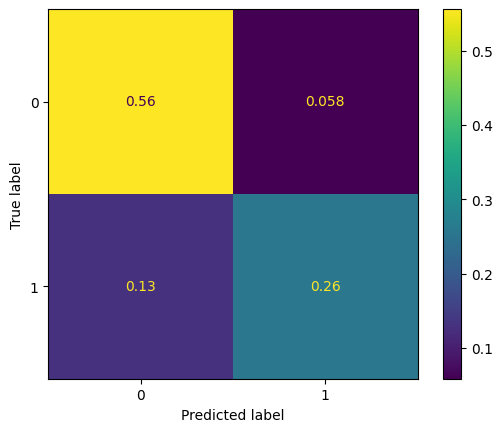

In [54]:
arbol_alfa2 = DecisionTreeClassifier(criterion = criterio, random_state= 16, ccp_alpha=optimal_alpha, max_depth=3, min_samples_leaf=5)
arbol_alfa2.fit(X_train, y_train)
y_pred_alfa = arbol_alfa2.predict(X_test)
print('Score train: ', arbol_alfa2.score(X_train, y_train))
print('Score test: ', arbol_alfa2.score(X_test, y_test))
cm_alfa = confusion_matrix(y_test, y_pred_alfa, normalize='all')
ConfusionMatrixDisplay(cm_alfa).plot()